In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [33]:
df = pd.read_csv('/content/spam.csv', delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [34]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
#df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [36]:
inputs = Input(shape=[max_len])
layer = Embedding(max_words,50,input_length=max_len)(inputs)

In [37]:
layer = LSTM(128)(layer)
layer = Dense(128)(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(1.5)(layer)
layer = Activation('sigmoid')(layer)
model = Model(inputs=inputs,outputs=layer)

In [38]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_2 (LSTM)               (None, 128)               91648     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 activation_4 (Activation)   (None, 128)               0         
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129 

In [39]:
model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [40]:
history = model.fit(sequences_matrix,Y_train,batch_size=20,epochs=15,validation_split=0.2)

Epoch 1/15
168/168 [==============================] - 44s 249ms/step - loss: 0.2118 - accuracy: 0.9303 - val_loss: 0.0696 - val_accuracy: 0.9797
Epoch 2/15
168/168 [==============================] - 28s 169ms/step - loss: 0.0442 - accuracy: 0.9874 - val_loss: 0.0585 - val_accuracy: 0.9856
Epoch 3/15
168/168 [==============================] - 28s 165ms/step - loss: 0.0223 - accuracy: 0.9940 - val_loss: 0.0537 - val_accuracy: 0.9868
Epoch 4/15
168/168 [==============================] - 28s 164ms/step - loss: 0.0130 - accuracy: 0.9964 - val_loss: 0.0732 - val_accuracy: 0.9773
Epoch 5/15
168/168 [==============================] - 29s 173ms/step - loss: 0.0072 - accuracy: 0.9988 - val_loss: 0.0802 - val_accuracy: 0.9868
Epoch 6/15
168/168 [==============================] - 28s 164ms/step - loss: 0.0093 - accuracy: 0.9976 - val_loss: 0.0664 - val_accuracy: 0.9844
Epoch 7/15
168/168 [==============================] - 27s 163ms/step - loss: 0.0185 - accuracy: 0.9952 - val_loss: 0.0879 - val_ac

In [41]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
  metrics[[var1, var2]].plot()
  plt.title('Training and Validation ' + string)
  plt.xlabel ('Number of epochs')
  plt.ylabel(string)
  plt.legend([var1, var2])

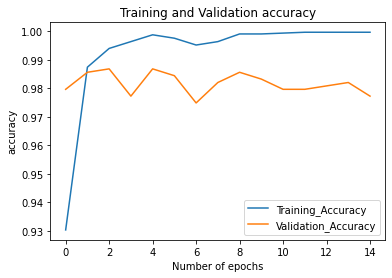

In [42]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [43]:
model.save('Spam_sms_classifier.h5')

In [44]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [45]:
accuracy1 = model.evaluate(test_sequences_matrix,Y_test)

44/44 [==============================] - 3s 79ms/step - loss: 0.0940 - accuracy: 0.9856


In [46]:
print(' Accuracy: {:0.5f}'.format(accuracy1[0],accuracy1[1]))

 Accuracy: 0.09403
